### <span style="color:#668B8B">Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:</span>

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти тут. (35 баллов)

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

Файлы:

#### <span style="color:#668B8B">olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей</span>

customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

#### <span style="color:#668B8B">olist_orders_dataset.csv —  таблица заказов</span>

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

#### <span style="color:#668B8B"> olist_order_items_dataset.csv —  товарные позиции, входящие в заказы</span>
    
order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5
Уникальные статусы заказов в таблице olist_orders_dataset:
- ##### created —  создан
- ##### approved —  подтверждён
- ##### invoiced —  выставлен счёт
- ##### processing —  в процессе сборки заказа
- ##### shipped —  отгружен со склада
- ##### delivered —  доставлен пользователю
- ##### unavailable —  недоступен
- ##### canceled —  отменён

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
assessments=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shihanov-30/intermediate_project/assessments.csv')

In [3]:
courses=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shihanov-30/intermediate_project/courses.csv')

In [4]:
studentAssessment=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shihanov-30/intermediate_project/studentAssessment.csv')

In [5]:
studentRegistration=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-shihanov-30/intermediate_project/studentRegistration.csv')

In [6]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [7]:
assessments.dtypes

code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

In [8]:
assessments.shape

(206, 6)

In [9]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [10]:
courses.dtypes

code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object

In [11]:
courses.shape

(22, 3)

In [12]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [13]:
studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [14]:
studentAssessment.shape

(173912, 5)

In [15]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [16]:
studentRegistration.dtypes

code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object

In [17]:
studentRegistration.shape

(32593, 5)

In [18]:
student1=studentAssessment.merge(assessments).merge(courses).merge(studentRegistration)
student1

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length,date_registration,date_unregistration
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,268,-159.0,NaN
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,268,-159.0,NaN
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,268,-159.0,NaN
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,268,-159.0,NaN
4,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,268,-159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173907,37439,573320,227,0,80.0,GGG,2014J,CMA,229.0,0.0,269,-4.0,NaN
173908,37440,573320,227,0,100.0,GGG,2014J,CMA,229.0,0.0,269,-4.0,NaN
173909,37441,573320,227,0,100.0,GGG,2014J,CMA,229.0,0.0,269,-4.0,NaN
173910,37442,573320,227,0,20.0,GGG,2014J,CMA,229.0,0.0,269,-4.0,NaN


In [19]:
#############################################################################################################################

Учебный курс — серия учебных занятий, идущая по плану и расписанию, нацеленная на обучение одному учебному предмету. 
Это значит мы в этом задании за отдельный курс берем идентификационный код предмета "code_module", ниже на графике показано распределение студентов по курсам

In [20]:
############################################################################################################################

In [21]:
studentRegistration.id_student.nunique()

28785

Всего зарегистрировшихся студентов на прохождения курсов 28785

In [22]:
cours_asses=courses.merge(assessments)
cours_asses

,code_module,code_presentation,module_presentation_length,id_assessment,assessment_type,date,weight
0,AAA,2013J,268,1752,TMA,19.0,10.0
1,AAA,2013J,268,1753,TMA,54.0,20.0
2,AAA,2013J,268,1754,TMA,117.0,20.0
3,AAA,2013J,268,1755,TMA,166.0,20.0
4,AAA,2013J,268,1756,TMA,215.0,30.0
...,...,...,...,...,...,...,...
201,GGG,2014B,241,37433,CMA,222.0,0.0
202,GGG,2014B,241,37425,TMA,61.0,0.0
203,GGG,2014B,241,37426,TMA,117.0,0.0
204,GGG,2014B,241,37427,TMA,166.0,0.0


In [23]:
cours_asses_st_reg=studentRegistration.merge(cours_asses)
cours_asses_st_reg

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0
...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0


In [24]:
cours_asses_st_reg.query("assessment_type=='Exam'").groupby(['code_module','assessment_type','id_student'],as_index=False)\
                                                                                            .agg({'id_assessment':'count'})

,code_module,assessment_type,id_student,id_assessment
0,AAA,Exam,6516,1
1,AAA,Exam,11391,1
2,AAA,Exam,24734,1
3,AAA,Exam,26192,1
4,AAA,Exam,28061,1
...,...,...,...,...
31279,GGG,Exam,2679821,1
31280,GGG,Exam,2682002,1
31281,GGG,Exam,2684003,1
31282,GGG,Exam,2689480,1


In [25]:
course_distribution=cours_asses_st_reg.groupby(['code_module','id_student'], as_index=False).agg({'id_assessment':'count'})\
                                                        .groupby('code_module', as_index=False).agg({'id_student':'count'})\
                                                        .rename(columns={'id_student':'number_of_students'})
course_distribution

,code_module,number_of_students
0,AAA,712
1,BBB,7692
2,CCC,4251
3,DDD,5848
4,EEE,2859
5,FFF,7397
6,GGG,2525


[Text(0, 0.5, 'Колл-во студентов зарегистрировшихся на курс'),
 Text(0.5, 0, 'Код курса'),
 Text(0.5, 1.0, 'Распределение студентов по курсам')]

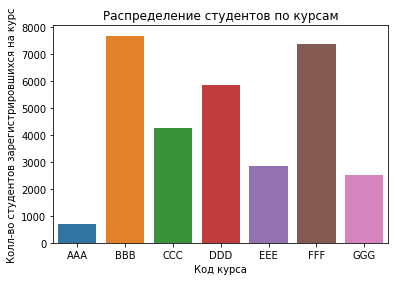

In [26]:
ax = sns.barplot(x="code_module", y="number_of_students", data=course_distribution)
ax.set (xlabel='Код курса', ylabel='Колл-во студентов зарегистрировшихся на курс', title='Распределение студентов по курсам')

In [27]:
student=cours_asses_st_reg.merge(studentAssessment, how ='left')
student

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0


In [28]:
student.id_student.nunique()

28785

# 1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене) (7 баллов). Оценка ниже 40 неудачная неуспешная сдача теста

In [29]:
st_exam=student.query("assessment_type=='Exam' and score>=40")
st_exam

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
85662,CCC,2014B,29764,-34.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,94.0
85672,CCC,2014B,29820,-57.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,76.0
85692,CCC,2014B,40604,-17.0,NaN,241,24290,Exam,NaN,100.0,234.0,0.0,66.0
85702,CCC,2014B,42638,-52.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,50.0
85722,CCC,2014B,46605,-54.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182952,DDD,2014J,2677210,-109.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,71.0
182959,DDD,2014J,2678380,-127.0,NaN,262,25368,Exam,NaN,100.0,242.0,0.0,64.0
182980,DDD,2014J,2684043,-42.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,69.0
182987,DDD,2014J,2685863,-136.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,49.0


In [30]:
st_exam.groupby(['code_module'],as_index=False).agg({'id_student':'count'})

,code_module,id_student
0,CCC,1683
1,DDD,2709


In [31]:
st_exam.id_student.nunique()

4097

In [32]:
st_exam.groupby(['id_student'], as_index=False).agg({'code_module':'count'}).query("code_module==1").shape

(3802, 2)

In [33]:
#########################################################################################################################

3802 студентов сдали успешно только один курс. Если брать тех студентов которые физически здавали экзамен по курсу и им не перезачитывали их. 

In [34]:
#########################################################################################################################

Так же можно посмотреть тех студентов которые закончили только один курс

In [35]:
#########################################################################################################################

In [36]:
student.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0


In [37]:
student.query("date_unregistration=='NaN'").groupby(['id_student','code_module'], as_index=False).\
                                                                agg({'code_presentation':'count'}).\
                                                                groupby('id_student', as_index=False).\
                                                                agg({'code_module':'count'}).query("code_module==1").shape

(19945, 2)

In [38]:
#########################################################################################################################

19945 студентов закончили только один курс

In [39]:
#########################################################################################################################

# 2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой исамой высокой завершаемостью*. (5 баллов) *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [40]:
student_reg=student.query("date_registration!='NaN'&date_unregistration=='NaN'")
student_reg

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0


In [41]:
student_success=student_reg.query("date_registration!='NaN'&date_unregistration=='NaN'&score>40")
student_success

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323917,GGG,2014J,2684003,-28.0,NaN,269,37440,CMA,229.0,0.0,172.0,0.0,100.0
323918,GGG,2014J,2684003,-28.0,NaN,269,37441,CMA,229.0,0.0,206.0,0.0,100.0
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0


In [42]:
student_registration=student_reg.groupby("code_module", as_index=False).agg({'date_registration':'count'}).\
                                            rename(columns={'date_registration':'date_registration_total'})
student_registration

,code_module,date_registration_total
0,AAA,3732
1,BBB,57036
2,CCC,24860
3,DDD,34328
4,EEE,11080
5,FFF,69953
6,GGG,22450


In [43]:
student_registration_success=student_success.groupby("code_module", as_index=False).agg({'date_registration':'count'}).\
                                                        rename(columns={'date_registration':'date_registration_success'})
student_registration_success

,code_module,date_registration_success
0,AAA,2832
1,BBB,38413
2,CCC,15051
3,DDD,24914
4,EEE,7333
5,FFF,50347
6,GGG,14248


In [44]:
student_registration['date_registration_success']=student_registration_success.date_registration_success

In [45]:
student_registration['completeness']=round((student_registration.date_registration_success/student_registration.date_registration_total), 2)

In [46]:
student_registration.sort_values('completeness')

,code_module,date_registration_total,date_registration_success,completeness
2,CCC,24860,15051,0.61
6,GGG,22450,14248,0.63
4,EEE,11080,7333,0.66
1,BBB,57036,38413,0.67
5,FFF,69953,50347,0.72
3,DDD,34328,24914,0.73
0,AAA,3732,2832,0.76


In [47]:
########################################################################################################################

Если брать все курсы по общей сдаче колличества тестов то у курса "ААА" самая высокая завершенность, а у курса "ССС" 
самая низкая завершенность.

In [48]:
########################################################################################################################

In [49]:
st_exam_total=student.query("assessment_type=='Exam'&date_registration!='NaN'&date_unregistration=='NaN'& score!='NaN'")
st_exam_total

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
85662,CCC,2014B,29764,-34.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,94.0
85672,CCC,2014B,29820,-57.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,76.0
85692,CCC,2014B,40604,-17.0,NaN,241,24290,Exam,NaN,100.0,234.0,0.0,66.0
85702,CCC,2014B,42638,-52.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,50.0
85722,CCC,2014B,46605,-54.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182952,DDD,2014J,2677210,-109.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,71.0
182959,DDD,2014J,2678380,-127.0,NaN,262,25368,Exam,NaN,100.0,242.0,0.0,64.0
182980,DDD,2014J,2684043,-42.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,69.0
182987,DDD,2014J,2685863,-136.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,49.0


In [50]:
st_exam_success=st_exam_total.query("date_registration!='NaN'&date_unregistration=='NaN'&score>40& score!='NaN'")
st_exam_success

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
85662,CCC,2014B,29764,-34.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,94.0
85672,CCC,2014B,29820,-57.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,76.0
85692,CCC,2014B,40604,-17.0,NaN,241,24290,Exam,NaN,100.0,234.0,0.0,66.0
85702,CCC,2014B,42638,-52.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,50.0
85722,CCC,2014B,46605,-54.0,NaN,241,24290,Exam,NaN,100.0,230.0,0.0,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182952,DDD,2014J,2677210,-109.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,71.0
182959,DDD,2014J,2678380,-127.0,NaN,262,25368,Exam,NaN,100.0,242.0,0.0,64.0
182980,DDD,2014J,2684043,-42.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,69.0
182987,DDD,2014J,2685863,-136.0,NaN,262,25368,Exam,NaN,100.0,243.0,0.0,49.0


In [51]:
student_registration_exam=st_exam_total.groupby("code_module", as_index=False).agg({'date_registration':'count'}).\
                                                    rename(columns={'date_registration':'date_registration_total'})
student_registration_exam

,code_module,date_registration_total
0,CCC,1915
1,DDD,3043


In [52]:
student_registration_exam_success=st_exam_success.groupby("code_module", as_index=False).agg({'date_registration':'count'}).\
                                                            rename(columns={'date_registration':'date_registration_success'})
student_registration_exam_success

,code_module,date_registration_success
0,CCC,1645
1,DDD,2637


In [53]:
student_registration_exam['date_registration_success']=student_registration_exam_success.date_registration_success

In [54]:
student_registration_exam['completeness']=round((student_registration_exam_success.date_registration_success/student_registration_exam.date_registration_total), 2)
student_registration_exam

,code_module,date_registration_total,date_registration_success,completeness
0,CCC,1915,1645,0.86
1,DDD,3043,2637,0.87


In [55]:
########################################################################################################################

Если брать курсы по которым сдавали экзамены  assessment_type=Exam то у "DDD" самая высокая завершенность, а у курса "ССС" самая низкая завершенность.

In [56]:
#########################################################################################################################

In [57]:
student_registration_assessment=student.groupby(["code_module","id_assessment"], as_index=False).\
                                                                agg({'date_registration':'count'}).\
                                                                rename(columns={'date_registration':'date_registration_total'})
student_registration_assessment

,code_module,id_assessment,date_registration_total
0,AAA,1752,383
1,AAA,1753,383
2,AAA,1754,383
3,AAA,1755,383
4,AAA,1756,383
...,...,...,...
201,GGG,37440,749
202,GGG,37441,749
203,GGG,37442,749
204,GGG,37443,749


In [58]:
student_registration_success_assessment=student_reg.groupby(["code_module","id_assessment"], as_index=False).\
                                                            agg({'date_registration':'count'}).\
                                                            rename(columns={'date_registration':'date_registration_success'})
student_registration_success_assessment

,code_module,id_assessment,date_registration_success
0,AAA,1752,323
1,AAA,1753,323
2,AAA,1754,323
3,AAA,1755,323
4,AAA,1756,323
...,...,...,...
201,GGG,37440,625
202,GGG,37441,625
203,GGG,37442,625
204,GGG,37443,625


In [59]:
student_registration_assessment['completeness']=round((student_registration_success_assessment.date_registration_success/student_registration_assessment.date_registration_total), 2)

In [60]:
student_registration_assessment.min()

code_module                 AAA
id_assessment              1752
date_registration_total     365
completeness               0.54
dtype: object

In [61]:
student_registration_assessment.max()

code_module                  GGG
id_assessment              40088
date_registration_total     2495
completeness                0.93
dtype: object

In [62]:
###########################################################################################################################

Самая высокая завершонность у теста №40088 и имеет коэфициент 0.93 в курсе "GGG", самая низкая завершенность у теста №1752 и
имеет коэфициент 0.54 в курсе "AAA"

In [63]:
############################################################################################################################

In [64]:
student_registration_exam_assessment=st_exam_total.groupby(["code_module","id_assessment"], as_index=False).\
                                                                agg({'date_registration':'count'}).\
                                                                rename(columns={'date_registration':'date_registration_total'})
student_registration_exam_assessment

,code_module,id_assessment,date_registration_total
0,CCC,24290,747
1,CCC,24299,1168
2,DDD,25340,602
3,DDD,25354,967
4,DDD,25361,524
5,DDD,25368,950


In [65]:
student_registration_exam_success_assessment=st_exam_success.groupby(["code_module","id_assessment"], as_index=False).\
                                                            agg({'date_registration':'count'}).\
                                                            rename(columns={'date_registration':'date_registration_success'})
student_registration_exam_success_assessment

,code_module,id_assessment,date_registration_success
0,CCC,24290,650
1,CCC,24299,995
2,DDD,25340,478
3,DDD,25354,856
4,DDD,25361,478
5,DDD,25368,825


In [66]:
student_registration_exam_assessment['date_registration_success']=student_registration_exam_success_assessment.date_registration_success
student_registration_exam_assessment['completeness']=round((student_registration_exam_success_assessment.date_registration_success/student_registration_exam_assessment.date_registration_total), 2)
student_registration_exam_assessment.sort_values('completeness')

,code_module,id_assessment,date_registration_total,date_registration_success,completeness
2,DDD,25340,602,478,0.79
1,CCC,24299,1168,995,0.85
0,CCC,24290,747,650,0.87
5,DDD,25368,950,825,0.87
3,DDD,25354,967,856,0.89
4,DDD,25361,524,478,0.91


In [67]:
###########################################################################################################################

Самая высокая завершонность у тестов в курсах по которым сдавали экзамены тест  assessment_type=Exam №25361 и имеет коэфициент 0.91 в курсе "DDD", самая низкая завершенность у теста №25340 и имеет коэфициент 0.79 в курсе "DDD"

In [68]:
############################################################################################################################

# 3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). (5 баллов)

In [69]:
student_submitted=student.query("date_submitted!='NaN'")
student_submitted

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323917,GGG,2014J,2684003,-28.0,NaN,269,37440,CMA,229.0,0.0,172.0,0.0,100.0
323918,GGG,2014J,2684003,-28.0,NaN,269,37441,CMA,229.0,0.0,206.0,0.0,100.0
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0


In [70]:
#################################################################################################

Если брать предметы где указан в assessment_type=Exam то средний срок сдачи по семестрам следующий

In [71]:
####################################################################################################

In [72]:
student_submitted.query("date_unregistration=='NaN'&score>40&assessment_type=='Exam'").\
                        groupby(['code_presentation','code_module'], as_index=False).\
                                                        agg({'date_submitted':'mean'})

,code_presentation,code_module,date_submitted
0,2013B,DDD,230.167364
1,2013J,DDD,239.514019
2,2014B,CCC,231.584615
3,2014B,DDD,234.945607
4,2014J,CCC,244.408040
5,2014J,DDD,242.802424


In [73]:
########################################################################################################

Если считать что тест это оканчательная сдача экзаменов по курсу то средний срок сдачи по семестрам следующий:

In [74]:
######################################################################################################

In [75]:
student_submitted2=student_submitted.query("date_unregistration=='NaN'&score>40").\
                      groupby(['code_presentation','code_module'], as_index=False).\
                      agg({'date_submitted':'mean'})
student_submitted2

,code_presentation,code_module,date_submitted
0,2013B,BBB,107.760787
1,2013B,DDD,106.441346
2,2013B,FFF,125.038275
3,2013J,AAA,112.011417
4,2013J,BBB,113.254512
5,2013J,DDD,115.231949
6,2013J,EEE,92.023074
7,2013J,FFF,128.114201
8,2013J,GGG,154.002316
9,2014B,BBB,100.066579


In [76]:
################################################################################################

Так же можно посмотреть средний срок сдачи не по семестрам

In [77]:
################################################################################################

In [78]:
student_submitted_mean=student_submitted.query("date_unregistration=='NaN'&score>40&assessment_type=='Exam'").\
                                                                      groupby(['code_module'], as_index=False).\
                                                                      agg({'date_submitted':'mean'})
student_submitted_mean

,code_module,date_submitted
0,CCC,239.341033
1,DDD,238.020478


In [79]:
student_submitted_mean1=student_submitted.query("date_unregistration=='NaN'&score>40").groupby(['code_module'], as_index=False).\
                                                                                                agg({'date_submitted':'mean'})
student_submitted_mean1

,code_module,date_submitted
0,AAA,111.947740
1,BBB,108.078333
2,CCC,124.533187
3,DDD,108.750181
4,EEE,92.009000
5,FFF,128.000894
6,GGG,152.356331


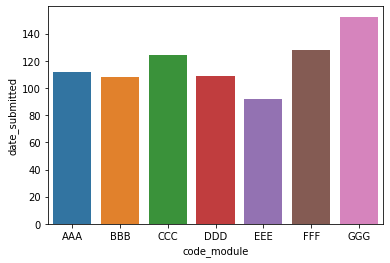

In [80]:
ax = sns.barplot(x="code_module", y="date_submitted", data=student_submitted_mean1)

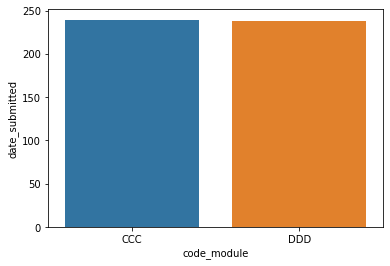

In [81]:
ax = sns.barplot(x="code_module", y="date_submitted", data=student_submitted_mean)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


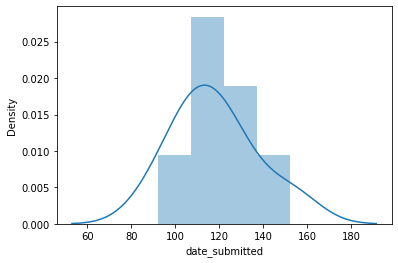

In [82]:
ax=sns.distplot(student_submitted_mean1.date_submitted)

# 4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)

In [83]:
count_registration=student.query("date_registration!='NaN'").groupby('code_module', as_index=False).\
                agg({'date_registration':'count'}).sort_values('date_registration', ascending=False)
count_registration

,code_module,date_registration
5,FFF,100763
1,BBB,81054
3,DDD,52892
2,CCC,44260
6,GGG,25340
4,EEE,14660
0,AAA,4488


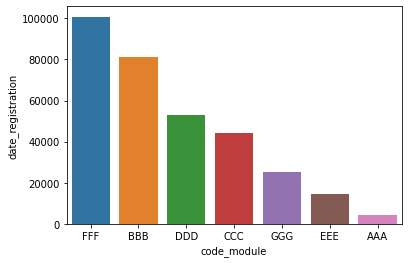

In [84]:
ax = sns.barplot(x="code_module", y="date_registration", data=count_registration)

In [85]:
###########################################################################################################

Самые популярные предметы за все время у студентов ТОП 3 предметов это -"FFF", "BBB","DDD"

In [86]:
###########################################################################################################

In [87]:
count_unregistration=student.query("date_unregistration!='NaN'").groupby('code_module', as_index=False).\
                agg({'date_unregistration':'count'}).sort_values('date_unregistration', ascending=False)
count_unregistration

,code_module,date_unregistration
5,FFF,30940
1,BBB,24108
2,CCC,19470
3,DDD,18662
4,EEE,3590
6,GGG,2890
0,AAA,756


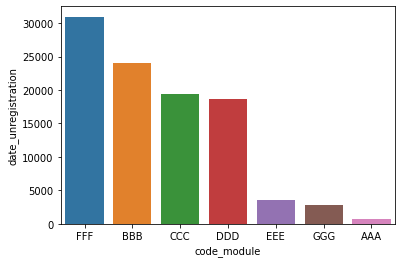

In [88]:
ax = sns.barplot(x="code_module", y="date_unregistration", data=count_unregistration)

In [89]:
#####################################################################################################################

ТОП 3 предметов с самым большим оттоком студентов за все время это - "FFF","BBB","CCC"

In [90]:
#####################################################################################################################

# 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (10 баллов) 

In [91]:
student_registration_presentation=student_reg.groupby("code_presentation", as_index=False).agg({'date_registration':'count'}).\
                                            rename(columns={'date_registration':'date_registration_total'})
student_registration_presentation

,code_presentation,date_registration_total
0,2013B,42938
1,2013J,63589
2,2014B,52476
3,2014J,64436


In [92]:
student_registration_success_presentation=student_success.groupby("code_presentation", as_index=False).agg({'date_registration':'count'}).\
                                                        rename(columns={'date_registration':'date_registration_success'})
student_registration_success_presentation

,code_presentation,date_registration_success
0,2013B,29691
1,2013J,44300
2,2014B,33940
3,2014J,45207


In [93]:
student_registration_presentation['date_registration_success']=student_registration_success_presentation.date_registration_success

In [94]:
student_registration_presentation['completeness']=round((student_registration_success_presentation.date_registration_success/student_registration_presentation.date_registration_total), 2)
student_registration_presentation.sort_values('completeness')

,code_presentation,date_registration_total,date_registration_success,completeness
2,2014B,52476,33940,0.65
0,2013B,42938,29691,0.69
1,2013J,63589,44300,0.70
3,2014J,64436,45207,0.70


In [95]:
############################################################################################################

Если брать все курсы по общей сдаче колличества тестов то у семестра 2014В самая низкая завершенность.

In [96]:
############################################################################################################

In [97]:
student_registration_exam_presentation=st_exam_total.groupby("code_presentation", as_index=False).\
                                                                agg({'date_registration':'count'}).\
                                                                rename(columns={'date_registration':'date_registration_total'})
student_registration_exam_presentation

,code_presentation,date_registration_total
0,2013B,602
1,2013J,967
2,2014B,1271
3,2014J,2118


In [98]:
student_registration_exam_success_presentation=st_exam_success.groupby("code_presentation", as_index=False).\
                                                            agg({'date_registration':'count'}).\
                                                            rename(columns={'date_registration':'date_registration_success'})
student_registration_exam_success_presentation

,code_presentation,date_registration_success
0,2013B,478
1,2013J,856
2,2014B,1128
3,2014J,1820


In [99]:
student_registration_exam_presentation['date_registration_success']=student_registration_exam_success_presentation.date_registration_success

In [100]:
student_registration_exam_presentation['completeness']=round((student_registration_exam_success_presentation.date_registration_success/student_registration_exam_presentation.date_registration_total), 2)
student_registration_exam_presentation.sort_values('completeness')

,code_presentation,date_registration_total,date_registration_success,completeness
0,2013B,602,478,0.79
3,2014J,2118,1820,0.86
1,2013J,967,856,0.89
2,2014B,1271,1128,0.89


In [101]:
#############################################################################################################

Если брать курсы по которым сдавали экзамены assessment_type=Exam то у семестра 2013В самая низкая завершенность.

In [102]:
#############################################################################################################

In [103]:
deadline_avg=student_submitted.query("date_unregistration=='NaN'&score>40&assessment_type=='Exam'").\
                                                        groupby('code_presentation', as_index=False).\
                                                        agg({'date_submitted':'mean'})
deadline_avg.sort_values('date_submitted')

,code_presentation,date_submitted
0,2013B,230.167364
2,2014B,233.008865
1,2013J,239.514019
3,2014J,243.680220


In [104]:
####################################################################

Если брать предметы где указан в assessment_type=Exam то самый долгий средний  срок сдачи был в 2014J

In [105]:
###################################################################

In [106]:
deadline_avg1=student_submitted.query("date_unregistration=='NaN'&score>40").\
                               groupby(['code_presentation'], as_index=False).\
                               agg({'date_submitted':'mean'})
deadline_avg1.sort_values('date_submitted')

,code_presentation,date_submitted
0,2013B,113.974201
2,2014B,117.836152
1,2013J,122.345734
3,2014J,122.526445


In [107]:
###########################################################################

Если считать что тест это оканчательная сдача экзаменов по курсу то  самый долгий средний  срок сдачи так-же был в 2014J

In [108]:
###########################################################################

In [109]:
##################################################################################################

Из таблици ниже видно Если брать все курсы по общей сдаче колличества тестов то у семестра 2014В самая низкая завершенность, а у семестра 2014J самые долгие сроки сдачи.

In [110]:
####################################################################################################

In [111]:
student_registration_presentation['date_submitted']=deadline_avg1.date_submitted
student_registration_presentation.rename(columns={'date_submitted':'average_turnaround_time'}).\
                                       sort_values(['completeness','average_turnaround_time'])

,code_presentation,date_registration_total,date_registration_success,completeness,average_turnaround_time
2,2014B,52476,33940,0.65,117.836152
0,2013B,42938,29691,0.69,113.974201
1,2013J,63589,44300,0.70,122.345734
3,2014J,64436,45207,0.70,122.526445


In [112]:
################################################################################

Из таблици ниже видно Если брать предметы где указан в assessment_type=Exam то самый долгий средний срок сдачи был в 2014J, а у семестра 2013В самая низкая завершенность

In [113]:
##########################################################################################

In [114]:
student_registration_exam_presentation['date_submitted']=deadline_avg.date_submitted
student_registration_exam_presentation.rename(columns={'date_submitted':'average_turnaround_time'}).\
                                            sort_values(['completeness','average_turnaround_time'])

,code_presentation,date_registration_total,date_registration_success,completeness,average_turnaround_time
0,2013B,602,478,0.79,230.167364
3,2014J,2118,1820,0.86,243.680220
2,2014B,1271,1128,0.89,233.008865
1,2013J,967,856,0.89,239.514019


# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Описание подхода можно найти тут. (35 баллов)

In [115]:
student

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0


In [116]:
################################################################################################################################

Найдем R(recency) - среднее время сдачи одного экзамена каждым студентом.

In [117]:
################################################################################################################################

In [118]:
# rename(columns={'date_submitted':'average_turnaround_time'})

In [119]:
recency=student.query("date_submitted!='NaN'").groupby('id_student', as_index=False).agg({'date_submitted':'mean'}).round().\
                                                                                rename(columns={'date_submitted':'recency'})
recency

,id_student,recency
0,6516,112.0
1,8462,23.0
2,11391,112.0
3,23629,56.0
4,23698,133.0
...,...,...
23364,2698251,121.0
23365,2698257,116.0
23366,2698535,90.0
23367,2698577,106.0


In [120]:
################################################################################################################################

Найдем F(frequency) - завершаемость курсов каждым студентом. (завершенность=кол-во успешных экзаменов/кол-во всех попыток сдать экзамен)

In [121]:
################################################################################################################################

In [122]:
student_reg

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0


In [123]:
student_success

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323917,GGG,2014J,2684003,-28.0,NaN,269,37440,CMA,229.0,0.0,172.0,0.0,100.0
323918,GGG,2014J,2684003,-28.0,NaN,269,37441,CMA,229.0,0.0,206.0,0.0,100.0
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0


In [124]:
reg=student_reg.groupby(['id_student','code_module'],as_index=False).agg({'date_submitted':'count'}).\
                                        rename(columns={'date_submitted':'date_registration_total'})
reg

,id_student,code_module,date_registration_total
0,6516,AAA,5
1,11391,AAA,5
2,23629,BBB,4
3,23698,CCC,9
4,23798,BBB,11
...,...,...,...
22427,2698251,DDD,7
22428,2698257,AAA,5
22429,2698535,EEE,4
22430,2698577,BBB,5


In [125]:
success=student_success.groupby(['id_student','code_module'],as_index=False).agg({'date_submitted':'count'}).\
                                              rename(columns={'date_submitted':'successful_delivery'})
success

,id_student,code_module,successful_delivery
0,6516,AAA,5
1,11391,AAA,5
2,23629,BBB,4
3,23698,CCC,9
4,23798,BBB,11
...,...,...,...
20859,2698251,DDD,6
20860,2698257,AAA,5
20861,2698535,EEE,3
20862,2698577,BBB,5


In [126]:
frequency=success.merge(reg)
frequency

,id_student,code_module,successful_delivery,date_registration_total
0,6516,AAA,5,5
1,11391,AAA,5,5
2,23629,BBB,4,4
3,23698,CCC,9,9
4,23798,BBB,11,11
...,...,...,...,...
20859,2698251,DDD,6,7
20860,2698257,AAA,5,5
20861,2698535,EEE,3,4
20862,2698577,BBB,5,5


In [127]:
frequency['frequency']=frequency.successful_delivery/frequency.date_registration_total
frequency

,id_student,code_module,successful_delivery,date_registration_total,frequency
0,6516,AAA,5,5,1.000000
1,11391,AAA,5,5,1.000000
2,23629,BBB,4,4,1.000000
3,23698,CCC,9,9,1.000000
4,23798,BBB,11,11,1.000000
...,...,...,...,...,...
20859,2698251,DDD,6,7,0.857143
20860,2698257,AAA,5,5,1.000000
20861,2698535,EEE,3,4,0.750000
20862,2698577,BBB,5,5,1.000000


In [128]:
################################################################################################################################

Найдем M(monetary) - среднее количество баллов, получаемое за экзамен каждым студентом.

In [129]:
################################################################################################################################

In [130]:
student

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,268,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,268,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,268,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,268,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,268,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,269,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,269,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,269,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,269,37437,TMA,173.0,0.0,169.0,0.0,60.0


In [131]:
monetary=student.query('score!="NaN"').groupby('id_student', as_index=False).agg({'score':'mean'}).\
                                              rename(columns={'score':'monetary'})
monetary

,id_student,monetary
0,6516,61.800000
1,8462,87.000000
2,11391,82.000000
3,23629,82.500000
4,23698,74.444444
...,...,...
23346,2698251,58.142857
23347,2698257,67.800000
23348,2698535,39.250000
23349,2698577,64.400000


In [132]:
rfm=recency.merge(frequency).merge(monetary)
rfm

,id_student,recency,code_module,successful_delivery,date_registration_total,frequency,monetary
0,6516,112.0,AAA,5,5,1.000000,61.800000
1,11391,112.0,AAA,5,5,1.000000,82.000000
2,23629,56.0,BBB,4,4,1.000000,82.500000
3,23698,133.0,CCC,9,9,1.000000,74.444444
4,23798,120.0,BBB,11,11,1.000000,93.909091
...,...,...,...,...,...,...,...
20859,2698251,121.0,DDD,6,7,0.857143,58.142857
20860,2698257,116.0,AAA,5,5,1.000000,67.800000
20861,2698535,90.0,EEE,3,4,0.750000,39.250000
20862,2698577,106.0,BBB,5,5,1.000000,64.400000


In [133]:
rfm.frequency.min()

0.1111111111111111

In [134]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 94.0, 0.4: 110.0, 0.6: 119.0, 0.8: 133.0},
 'frequency': {0.2: 0.9090909090909091, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'monetary': {0.2: 64.41666666666667,
  0.4: 73.71428571428571,
  0.6: 80.28571428571429,
  0.8: 86.58333333333333}}

In [135]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5   

In [136]:
################################################################################################################################

Теперь теперь получим оценки R, F и M каждого клиента.

In [137]:
################################################################################################################################

In [138]:
rfm['r'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['f'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['m'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [139]:
rfm['rfm_score'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str)
rfm.head()

,id_student,recency,code_module,successful_delivery,date_registration_total,frequency,monetary,r,f,m,rfm_score
0,6516,112.0,AAA,5,5,1.0,61.800000,3,2,1,321
1,11391,112.0,AAA,5,5,1.0,82.000000,3,2,4,324
2,23629,56.0,BBB,4,4,1.0,82.500000,5,2,4,524
3,23698,133.0,CCC,9,9,1.0,74.444444,2,2,3,223
4,23798,120.0,BBB,11,11,1.0,93.909091,2,2,5,225


In [140]:
segt_map = {
    r'[5][2][5]': 'excellent student group A ',
    r'[2-4][2][5]': 'excellent student group В',
    r'[2-4][1][5]': 'excellent student group С', 
    
    r'[5][2][3-5]': 'good student group А',
    r'[2-4][2][3-5]': 'good student group В',
    r'[2-5][1][3-5]': 'good student group С',
    
    r'[3-5][2][2]': 'triple student group A',
    r'[1-3][2][1-5]': 'triple student group В',
    r'[1-3][1][1-5]': 'triple student group С', 
    
    r'[1-5][1-2][1-2]': 'underachieving student'
}

rfm['segment'] = rfm['r'].map(str) + rfm['f'].map(str)+ rfm['m'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm.head(60)

,id_student,recency,code_module,successful_delivery,date_registration_total,frequency,monetary,r,f,m,rfm_score,segment
0,6516,112.0,AAA,5,5,1.000000,61.800000,3,2,1,321,triple student group В
1,11391,112.0,AAA,5,5,1.000000,82.000000,3,2,4,324,good student group В
2,23629,56.0,BBB,4,4,1.000000,82.500000,5,2,4,524,good student group А
3,23698,133.0,CCC,9,9,1.000000,74.444444,2,2,3,223,good student group В
4,23798,120.0,BBB,11,11,1.000000,93.909091,2,2,5,225,excellent student group В
5,24186,161.0,GGG,7,8,0.875000,62.500000,1,1,1,111,triple student group С
6,24213,126.0,DDD,7,7,1.000000,76.285714,2,2,3,223,good student group В
7,24391,153.0,GGG,9,9,1.000000,88.888889,1,2,5,125,triple student group В
8,24734,122.0,AAA,4,5,0.800000,46.800000,2,1,1,211,triple student group С
9,25107,114.0,BBB,11,11,1.000000,77.363636,3,2,3,323,good student group В


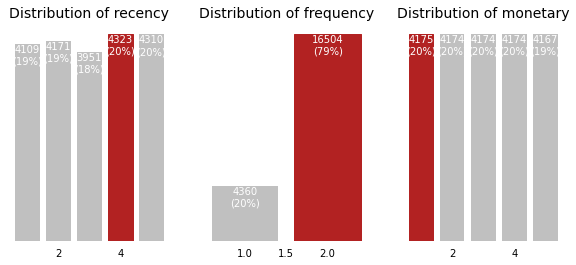

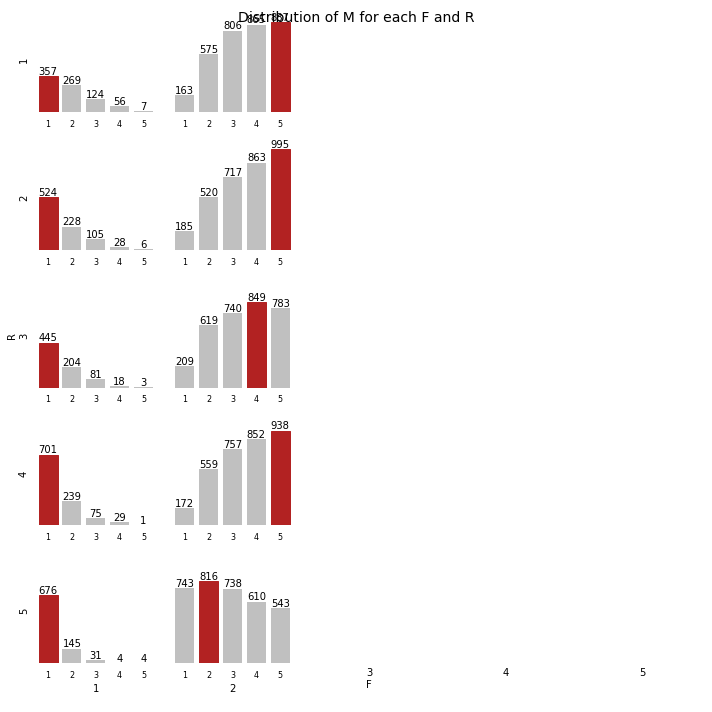

In [141]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, p in enumerate(['r', 'f', 'm']):
    parameters = {'r':'recency', 'f':'frequency','m':'monetary'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['r'] == r) & (rfm['f'] == f)]['m'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

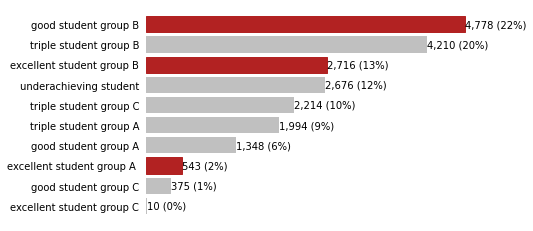

In [142]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['good student group В', 'excellent student group В', 'excellent student group A ']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Для более глубокого анализа решил сделать RFM для всех курсов т.к. по некоторым курсам нет экзаменов в assessment_type=Exam

In [143]:
###########################################